In [ ]:
!pip install torchmetrics

In [2]:
import csv
import os
import datetime
from pathlib import Path

import matplotlib.pyplot as plt
import torch
import torchmetrics
from torch.nn import CrossEntropyLoss
from torch.optim import Adam
from torch.utils.data import DataLoader
from torchvision.datasets import MNIST
from torchvision.models import resnet18
from torchvision.transforms import Compose, Normalize, ToTensor

In [3]:
from trainloop import train_loop_torch
from trainloop import build_resnet18
from trainloop import load_model_torch
from trainloop import build_data_loader_torch
from trainloop import report_metrics_torch
from trainloop import save_checkpoint_and_metrics_torch

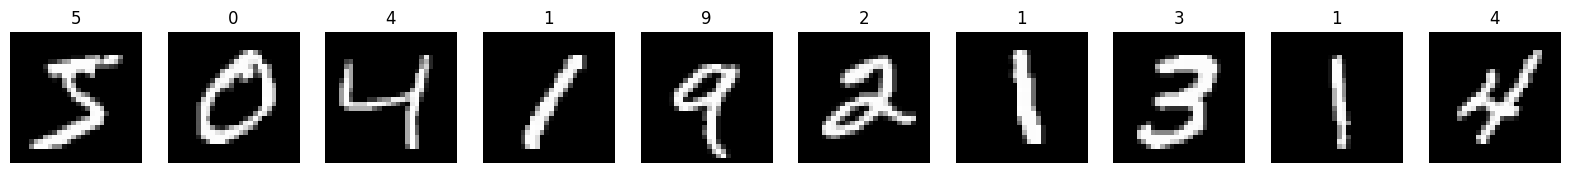

In [6]:
    dataset = MNIST(root="./data", train=True, download=True)

    fig, axes = plt.subplots(1, 10, figsize=(20, 2))
    for i in range(10):
        axes[i].imshow(dataset.train_data[i], cmap="gray")
        axes[i].axis("off")
        axes[i].set_title(dataset.train_labels[i].item())


## Launch the training loop

In [4]:
timestamp = datetime.datetime.now(datetime.UTC).strftime("%Y-%m-%d_%H-%M-%S")
local_path = f"/tmp/ray/torch_{timestamp}"
train_loop_torch(num_epochs=4, local_path=local_path)

{'loss': 0.2948448359966278, 'epoch': 0, 'accuracy': 0.7934361696243286}
{'loss': 0.09106287360191345, 'epoch': 1, 'accuracy': 0.9477664232254028}
{'loss': 0.05585106834769249, 'epoch': 2, 'accuracy': 0.9681657552719116}
{'loss': 0.07025408744812012, 'epoch': 3, 'accuracy': 0.9799846410751343}


### Load trained model

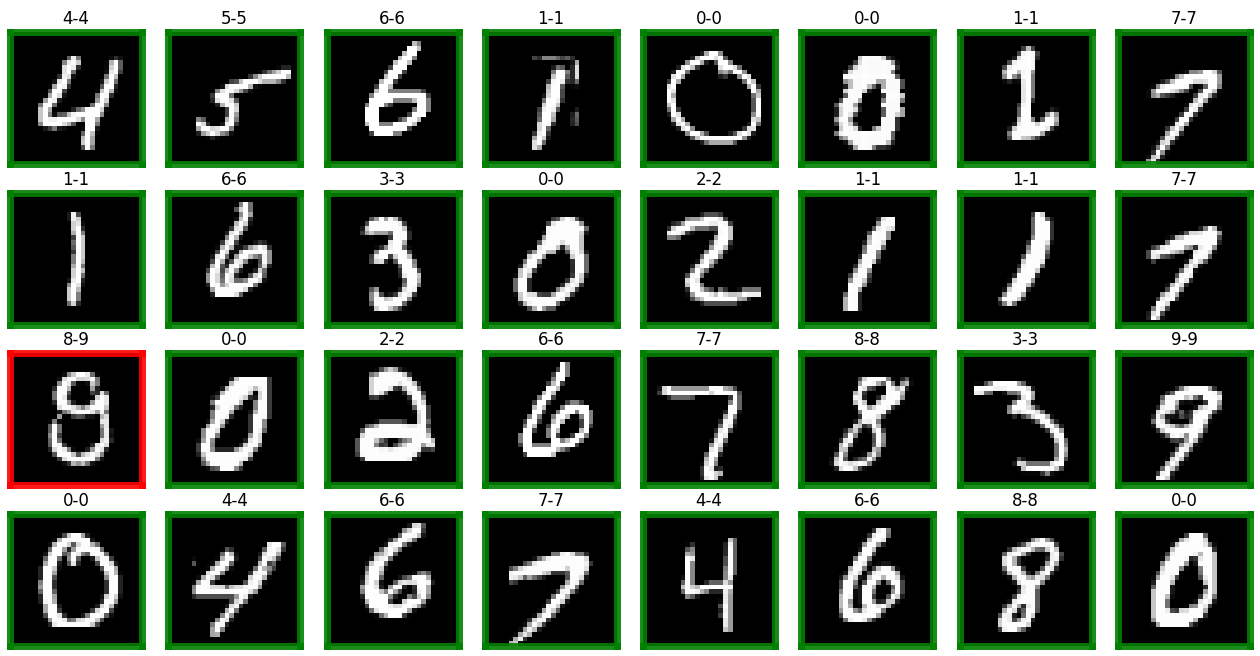

In [54]:
loaded_model = build_resnet18()
loaded_model.load_state_dict(torch.load(os.path.join(local_path, "model.pt")))
loaded_model.eval()
dataset = MNIST(root="./data", train=True, download=True)


rows = 4
cols = 8
start = rows * cols * 2
fig, axes = plt.subplots(rows, cols, figsize=(cols * 2, rows * 2))
#plt.rcParams['axes.linewidth'] = 0.1
for i in range(rows * cols):
    idx = i + start
    j = i // cols
    k = i % cols
    axes[j][k].imshow(dataset.test_data[idx], cmap="gray")

    axes[j][k].tick_params(
        which='both',      # both major and minor ticks are affected
        bottom=False,      # ticks along the bottom edge are off
        top=False,         # ticks along the top edge are off
        left=False,
        labelbottom=False,
        labelleft=False
    )
    with torch.no_grad():
        normalized = Normalize((0.5,), (0.5,))(ToTensor()(dataset[idx][0]))
        prediction = loaded_model(normalized.unsqueeze(0)).argmax()
    pred_num = prediction.item()
    labl_num = dataset.targets[idx].item()
    title = f"{pred_num}-{labl_num}"
    border_color = "green" if pred_num == labl_num else "red"
    plt.setp(axes[j][k].spines.values(), lw=5, color=border_color, alpha=0.9);
    axes[j][k].set_title(title)

                             